In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/creditcard/creditcard.csv


In [2]:
# Import necessary libraries
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score, accuracy_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Set plot style
plt.style.use('ggplot')

# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading data
df = pd.read_csv('/kaggle/input/creditcard/creditcard.csv')

# Exploratory Data Analysis

In [5]:
df.sample(50)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
123919,77113.0,-0.515724,1.682921,-0.074841,0.715000,0.428913,-0.708817,0.927964,-0.114117,-0.011593,...,0.078111,0.685421,0.071221,0.086586,-0.620200,-0.373572,0.772864,0.407854,0.89,0
252081,155644.0,-1.433299,0.303424,-1.547321,1.118274,1.423134,-1.024104,1.178246,-0.052709,-0.753158,...,0.118150,1.064548,0.905434,0.617248,-0.484837,-0.502704,0.466108,0.062960,75.80,0
59300,48781.0,0.912513,-1.260451,0.517440,-1.377157,-1.296483,0.043088,-0.789760,0.342163,2.022903,...,0.105179,0.093386,-0.147046,-0.312000,0.176529,-0.020785,0.016098,0.030747,154.85,0
147224,88257.0,1.845712,-0.081795,-2.539288,1.213541,0.865193,-1.054839,1.065707,-0.418533,-0.345462,...,0.395391,0.992490,-0.358263,-0.373321,0.793410,-0.197451,-0.085212,-0.075155,120.00,0
137882,82368.0,1.219934,-0.136037,-0.925719,0.153580,1.988328,3.705088,-0.594160,0.913170,0.356608,...,-0.299560,-0.872172,-0.021361,0.983863,0.672968,-0.512318,0.037499,0.023102,23.46,0
241267,150956.0,-2.148641,-0.882684,0.526458,-2.440796,0.058419,2.026643,0.056735,1.026445,-1.063371,...,-0.102274,-0.577142,-0.009168,-0.985355,0.346964,-0.447639,0.113456,-0.039325,238.23,0
145017,86567.0,1.403550,-1.222993,-0.669777,0.705260,-0.967137,-0.709057,0.025843,-0.192668,1.181640,...,-0.042727,-0.670757,0.127442,0.009685,-0.551343,-0.697985,-0.026931,0.021237,310.00,0
186862,127285.0,-0.297906,0.783295,-0.164107,-0.492625,0.765559,-0.288771,0.587462,0.104609,0.214966,...,0.124747,0.326957,-0.222198,0.614958,-0.134041,0.522562,-0.273044,0.069029,2.00,0
65517,51624.0,-2.217369,1.259382,1.624812,1.121974,-0.563962,1.933695,-2.479092,-4.441567,-0.047194,...,1.115568,0.432396,0.414261,-0.893231,0.317314,0.143383,0.667675,0.086776,23.49,0
42863,41277.0,-0.305985,1.109115,0.669167,0.959859,-0.180299,-0.425581,0.164359,0.475558,-0.500652,...,0.181754,0.428866,-0.029128,0.049630,-0.254328,-0.293599,-0.033044,-0.024993,1.50,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


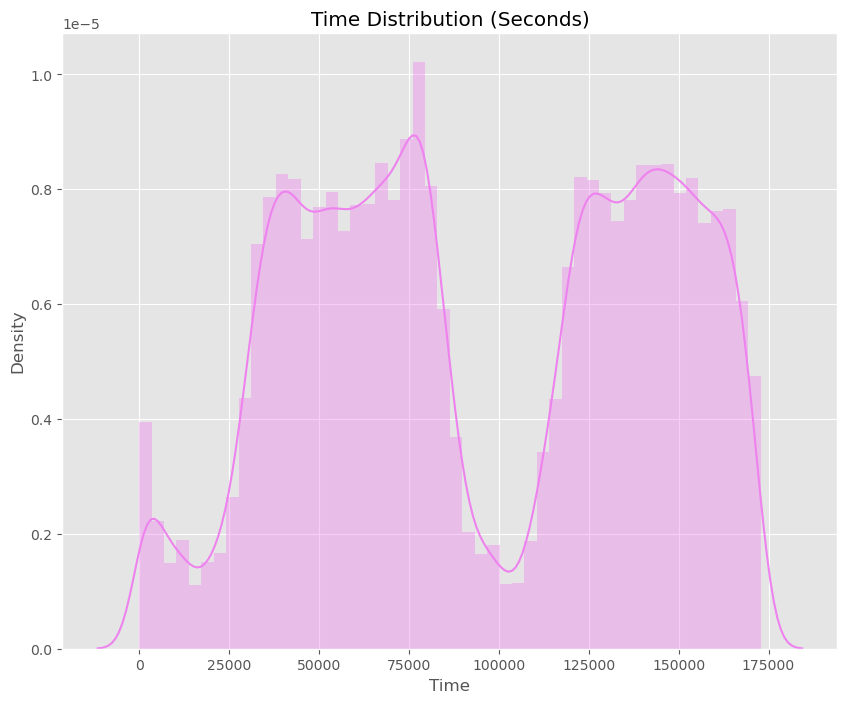

In [9]:
# Plotting distribution of Time feature
plt.figure(figsize=(10,8), )
plt.title('Time Distribution (Seconds)')
sns.distplot(df['Time'], color='violet')

# Save the plot as PNG file
plt.savefig('time_distribution.png');

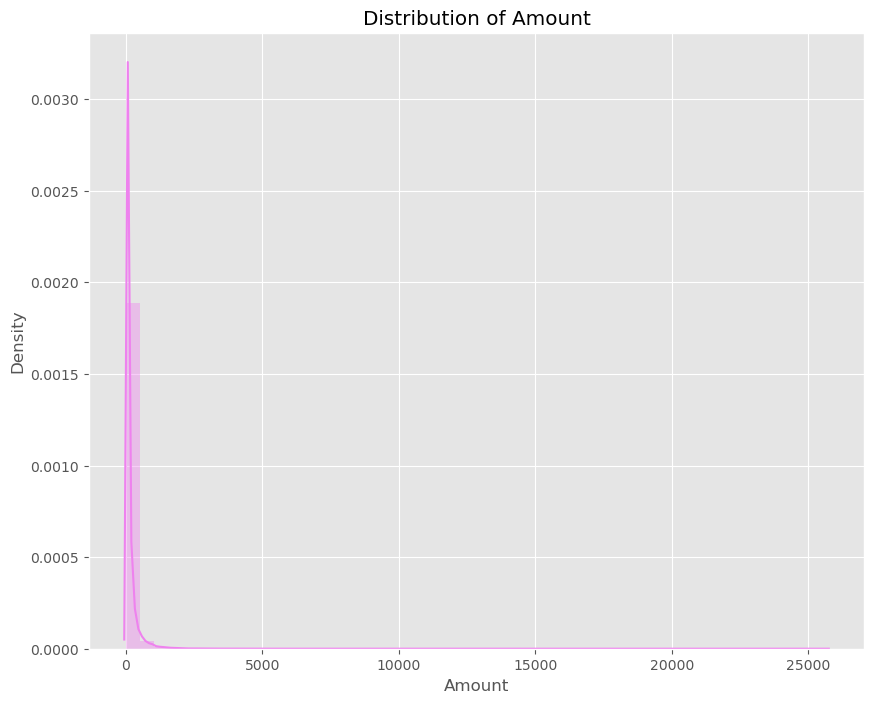

In [10]:
# Plotting distribution of Amount feature
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount')
sns.distplot(df['Amount'], color='violet')

# Save the plot as PNG file
plt.savefig('amount_distribution.png');

In [11]:
# Counting number of fraud vs non-fraud transactions and displaying them with their ratio
fraud = df['Class'].value_counts()[1]
nonfraud = df['Class'].value_counts()[0]
print(f'Fraudulent: {fraud}, Non-fraudulent: {nonfraud}')
print(f'Ratio of fraud to non-fraud: {fraud}/{nonfraud} ({fraud/nonfraud*100:.3f}%)')

Fraudulent: 492, Non-fraudulent: 284315
Ratio of fraud to non-fraud: 492/284315 (0.173%)


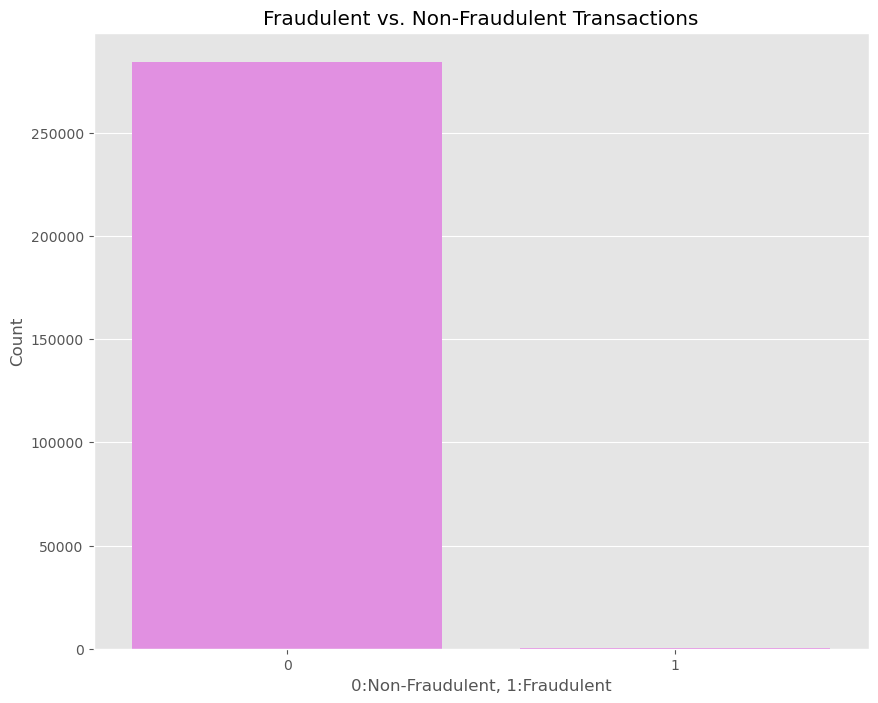

In [12]:
# Plotting count of fraud vs non-fraud transactions in a bar chart
plt.figure(figsize=(10,8))
sns.barplot(x=df['Class'].value_counts().index, y=df['Class'].value_counts(), color='violet')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('0:Non-Fraudulent, 1:Fraudulent')

# Save the plot as PNG file
plt.savefig('fraud_vs_nonfraud_transactions.png');

# Data Processing

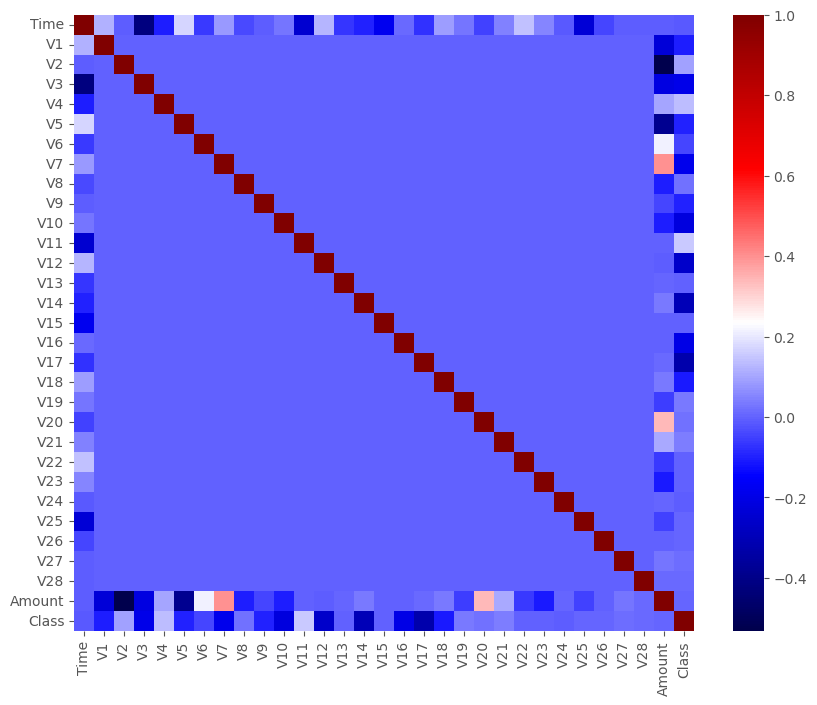

In [13]:
# Plotting heatmap to find any high correlations between variables
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), cmap="seismic", annot=False)
# plt.show()

# Save the plot as PNG file
plt.savefig('corr_heatmap.png');

# Modeling

In [14]:
# Drop the 'Class' column to prepare data for splitting
data = df.drop(columns=['Class'])

# Get the target variable
answer = df['Class']

In [15]:
# Split data into training, validation and test sets, ensuring the class distribution is maintained
X_trainval, X_test, y_trainval, y_test = train_test_split(data, answer
                                                          , test_size=0.2
                                                          , stratify=df['Class']
                                                          , random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval
                                                  , test_size=0.25
                                                  , stratify=y_trainval
                                                  , random_state=42)

# Initialize the StandardScaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Scale the training, validation, and test sets using the scaler
X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

In [16]:
# Undersampling will be utilized to address the issue of imbalanced classes.

# Instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Undersample the training set
X_train_under, y_train_under = rus.fit_resample(X_train_std, y_train)


# Undersample the validation set

# Logistic Regression

In [17]:
# Logistic Regression
# Run CV with 5 folds (logit)
penalty = ['l2']
C = np.logspace(0, 4, 10, 100, 1000)
param_grid = dict(C=C, penalty=penalty)

logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000)
logistic_grid = GridSearchCV(logistic, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
logistic_grid.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.15443469e+01, 4.64158883e+02, 1.00000000e+04,
       2.15443469e+05, 4.64158883e+06, 1.00000000e+08, 2.15443469e+09,
       4.64158883e+10, 1.00000000e+12]),
                         'penalty': ['l2']},
             scoring='roc_auc', verbose=10)

In [18]:
logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000, class_weight='balanced')


In [19]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Oversample the training set
X_train_over, y_train_over = smote.fit_resample(X_train_std, y_train)

# Classification report 

In [20]:
# Step 1: Import the necessary libraries
from sklearn.metrics import classification_report

# Step 2: Get the predicted labels for the validation set
y_val_pred = logistic_grid.predict(X_val_std)

# Step 3: Generate the classification report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56863
           1       0.03      0.90      0.05        99

    accuracy                           0.94     56962
   macro avg       0.51      0.92      0.51     56962
weighted avg       1.00      0.94      0.97     56962



# Naive Bayes

In [21]:
gnb = GaussianNB()
gnb_best = gnb.fit(X_train_under, y_train_under)

# Classification report

In [22]:
from sklearn.metrics import classification_report

y_val_pred = gnb_best.predict(X_val_std)

print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56863
           1       0.03      0.82      0.06        99

    accuracy                           0.95     56962
   macro avg       0.51      0.89      0.52     56962
weighted avg       1.00      0.95      0.97     56962



# Random Forest

In [23]:
param_grid = {
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt'],
    'min_samples_leaf': [10, 20],
    'min_samples_split': [2, 5],
    'n_estimators': [500, 700]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_train_under,y_train_under)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 4/5; 1/10] START C=1.0, penalty=l2..........................................
[CV 4/5; 1/10] END ...........C=1.0, penalty=l2;, score=0.948 total time=   0.0s
[CV 5/5; 2/10] START C=21.544346900318832, penalty=l2...........................
[CV 5/5; 2/10] END C=21.544346900318832, penalty=l2;, score=0.989 total time=   0.0s
[CV 4/5; 3/10] START C=464.15888336127773, penalty=l2...........................
[CV 4/5; 3/10] END C=464.15888336127773, penalty=l2;, score=0.955 total time=   0.1s
[CV 1/5; 4/10] START C=9999.999999999995, penalty=l2............................
[CV 1/5; 4/10] END C=9999.999999999995, penalty=l2;, score=0.999 total time=   0.2s
[CV 5/5; 4/10] START C=9999.999999999995, penalty=l2............................
[CV 5/5; 4/10] END C=9999.999999999995, penalty=l2;, score=0.981 total time=   0.2s
[CV 3/5; 5/10] START C=215443.46900318822, penalty=l2...........................
[CV 3/5; 5/10] END C=215443.46900

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': ['sqrt'],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [500, 700]},
             scoring='roc_auc', verbose=10)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train the logistic regression model with class weights balanced
logistic_model = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight='balanced')
logistic_model.fit(X_train_std, y_train)

# Predict on the validation set
y_val_pred = logistic_model.predict(X_val_std)

# Generate the classification report
print("Classification Report with Class Weights Balanced:")
print(classification_report(y_val, y_val_pred))


Classification Report with Class Weights Balanced:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.06      0.91      0.11        99

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



# Classification Report

In [25]:
from sklearn.metrics import classification_report

y_val_pred = rf_grid.predict(X_val_std)

print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.08      0.86      0.14        99

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.57     56962
weighted avg       1.00      0.98      0.99     56962



# Dummy Classifier

In [26]:
dummy = DummyClassifier()
dummy.fit(X_train_under, y_train_under)

DummyClassifier()

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train the logistic regression model with class weights balanced
logistic_model = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight='balanced')
logistic_model.fit(X_train_std, y_train)

# Predict on the validation set
y_val_pred = logistic_model.predict(X_val_std)

# Generate the classification report
print("Classification Report with Class Weights Balanced:")
print(classification_report(y_val, y_val_pred))


Classification Report with Class Weights Balanced:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.06      0.91      0.11        99

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



# Model Evaluation

# Find ROC Score

In [28]:
def plot_roc_curves(X, y, models, model_names, figsize=(20,18)):
    """
    Plots ROC curves for a list of models.

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): input features for the models
    y (numpy.ndarray or pandas.DataFrame): target variable
    models (list): list of models to compare
    model_names (list): list of model names to display on the plot
    figsize (tuple): size of the figure to display the plot

    Returns:
    None
    """
    fig, ax = plt.subplots(figsize=figsize)

    # Loop over models and plot ROC curve
    for i, model in enumerate(models):
        y_pred = list(model.predict_proba(X)[:, 1])
        fpr, tpr, threshold = metrics.roc_curve(y, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label=(model_names[i] + ' AUC = %0.4f' % roc_auc), linewidth=2.0)
    ax.grid(False)
    ax.tick_params(length=6, width=2, labelsize=30, grid_color='r', grid_alpha=0.5)
    leg = plt.legend(loc='lower right', prop={'size': 25})
    leg.get_frame().set_edgecolor('b')
    plt.title('Receiver Operating Characteristic (ROC)', fontsize=40)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('True Positive Rate', fontsize=30)
    plt.xlabel('False Positive Rate', fontsize=30)
    # plt.show()


In [29]:
# Define the list of models to compare
models = [logistic_grid.best_estimator_, gnb_best, rf_grid.best_estimator_, dummy]
model_names = ['Logit', 'Naive Bayes', 'Random Forest', 'Dummy']


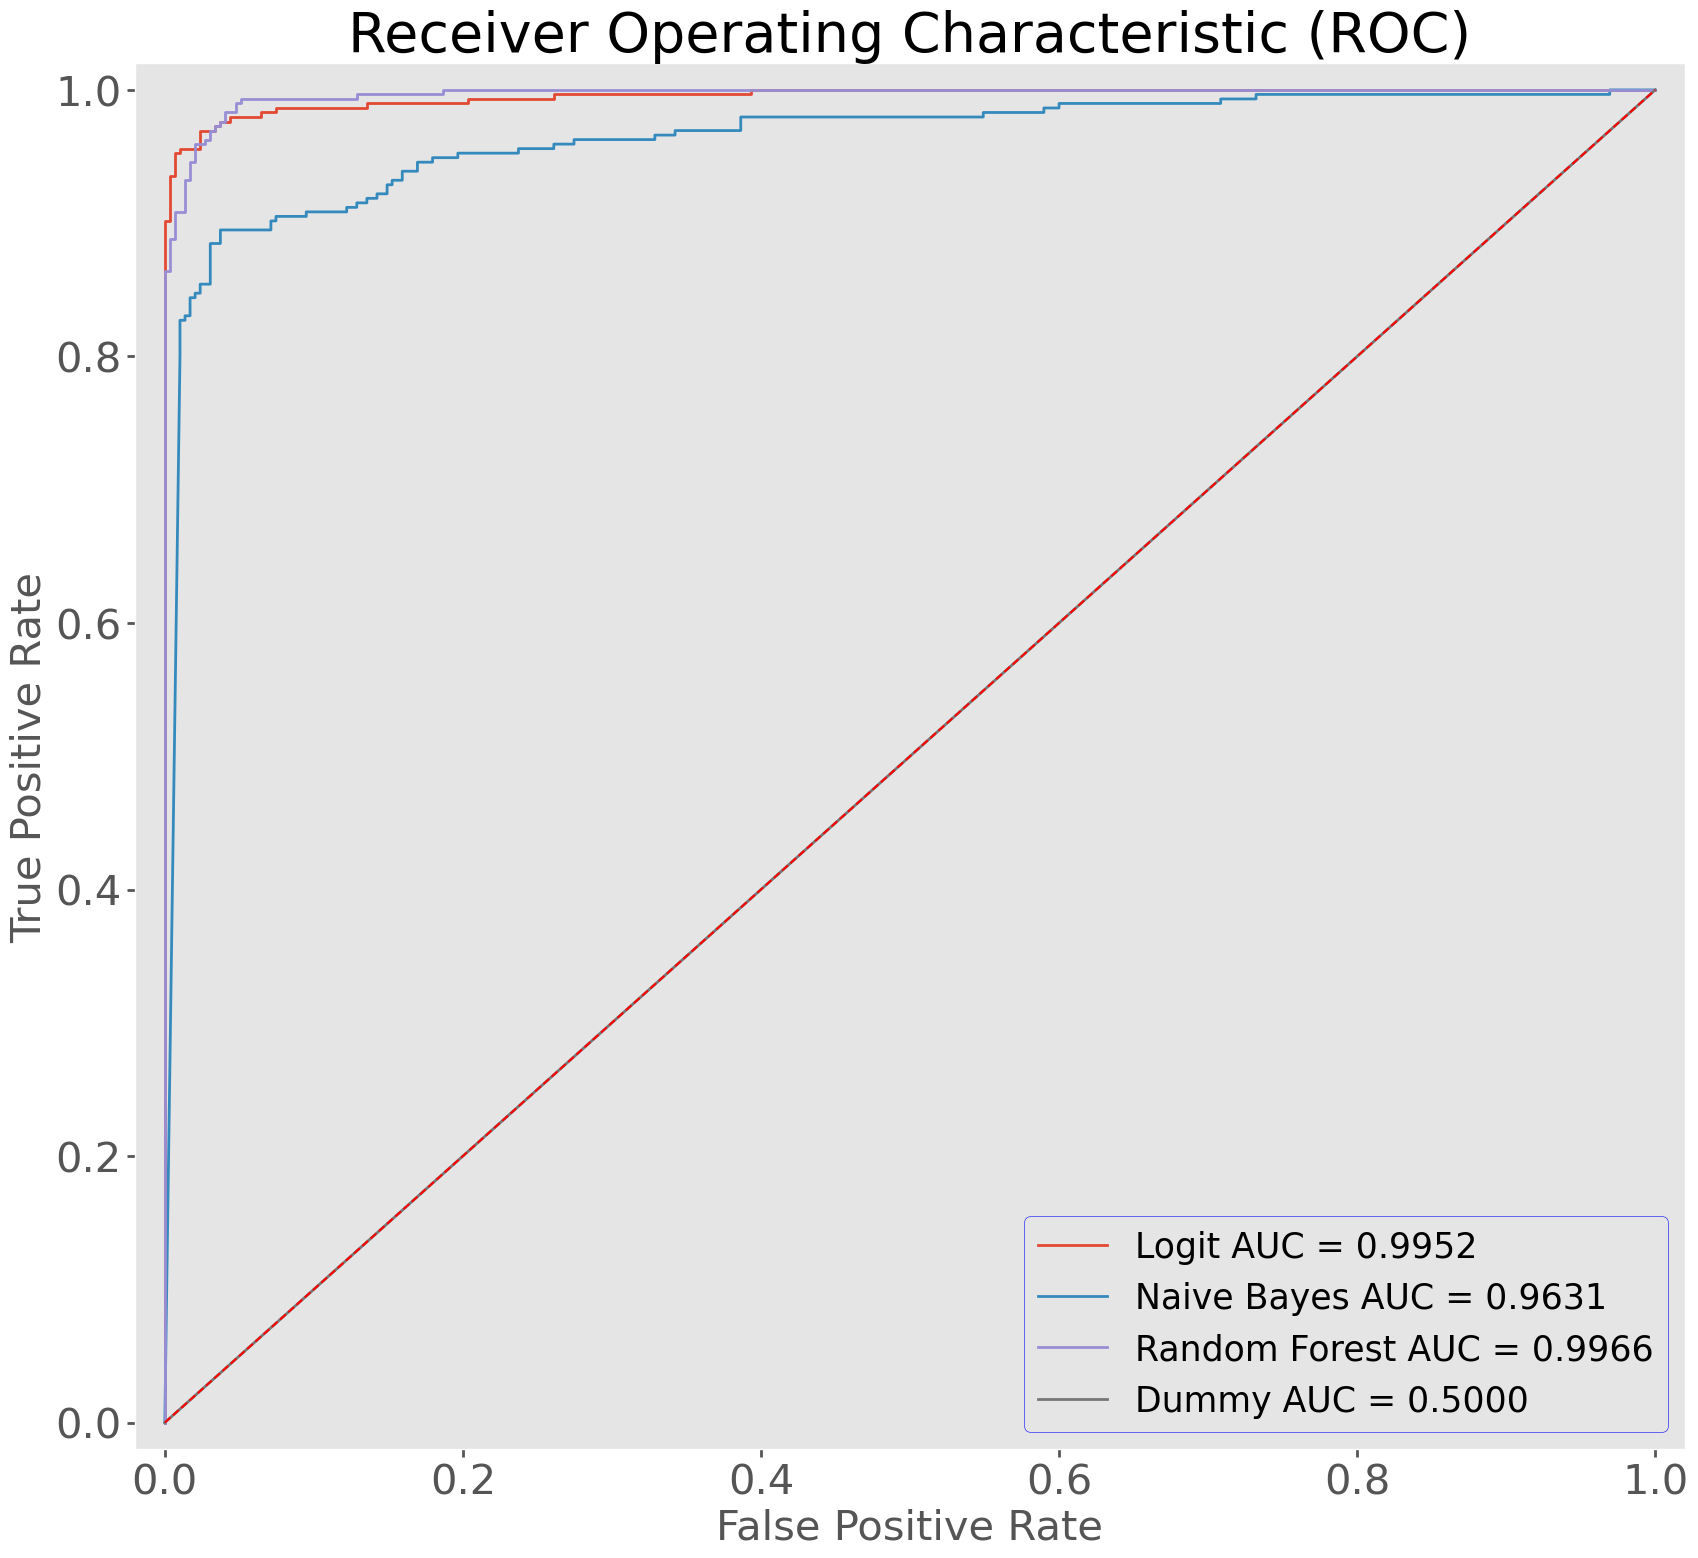

In [30]:
# Plot ROC curves for in-sample data
plot_roc_curves(X_train_under, y_train_under, models, model_names)

# Save the plot as PNG file
plt.savefig('roc_insample.png');

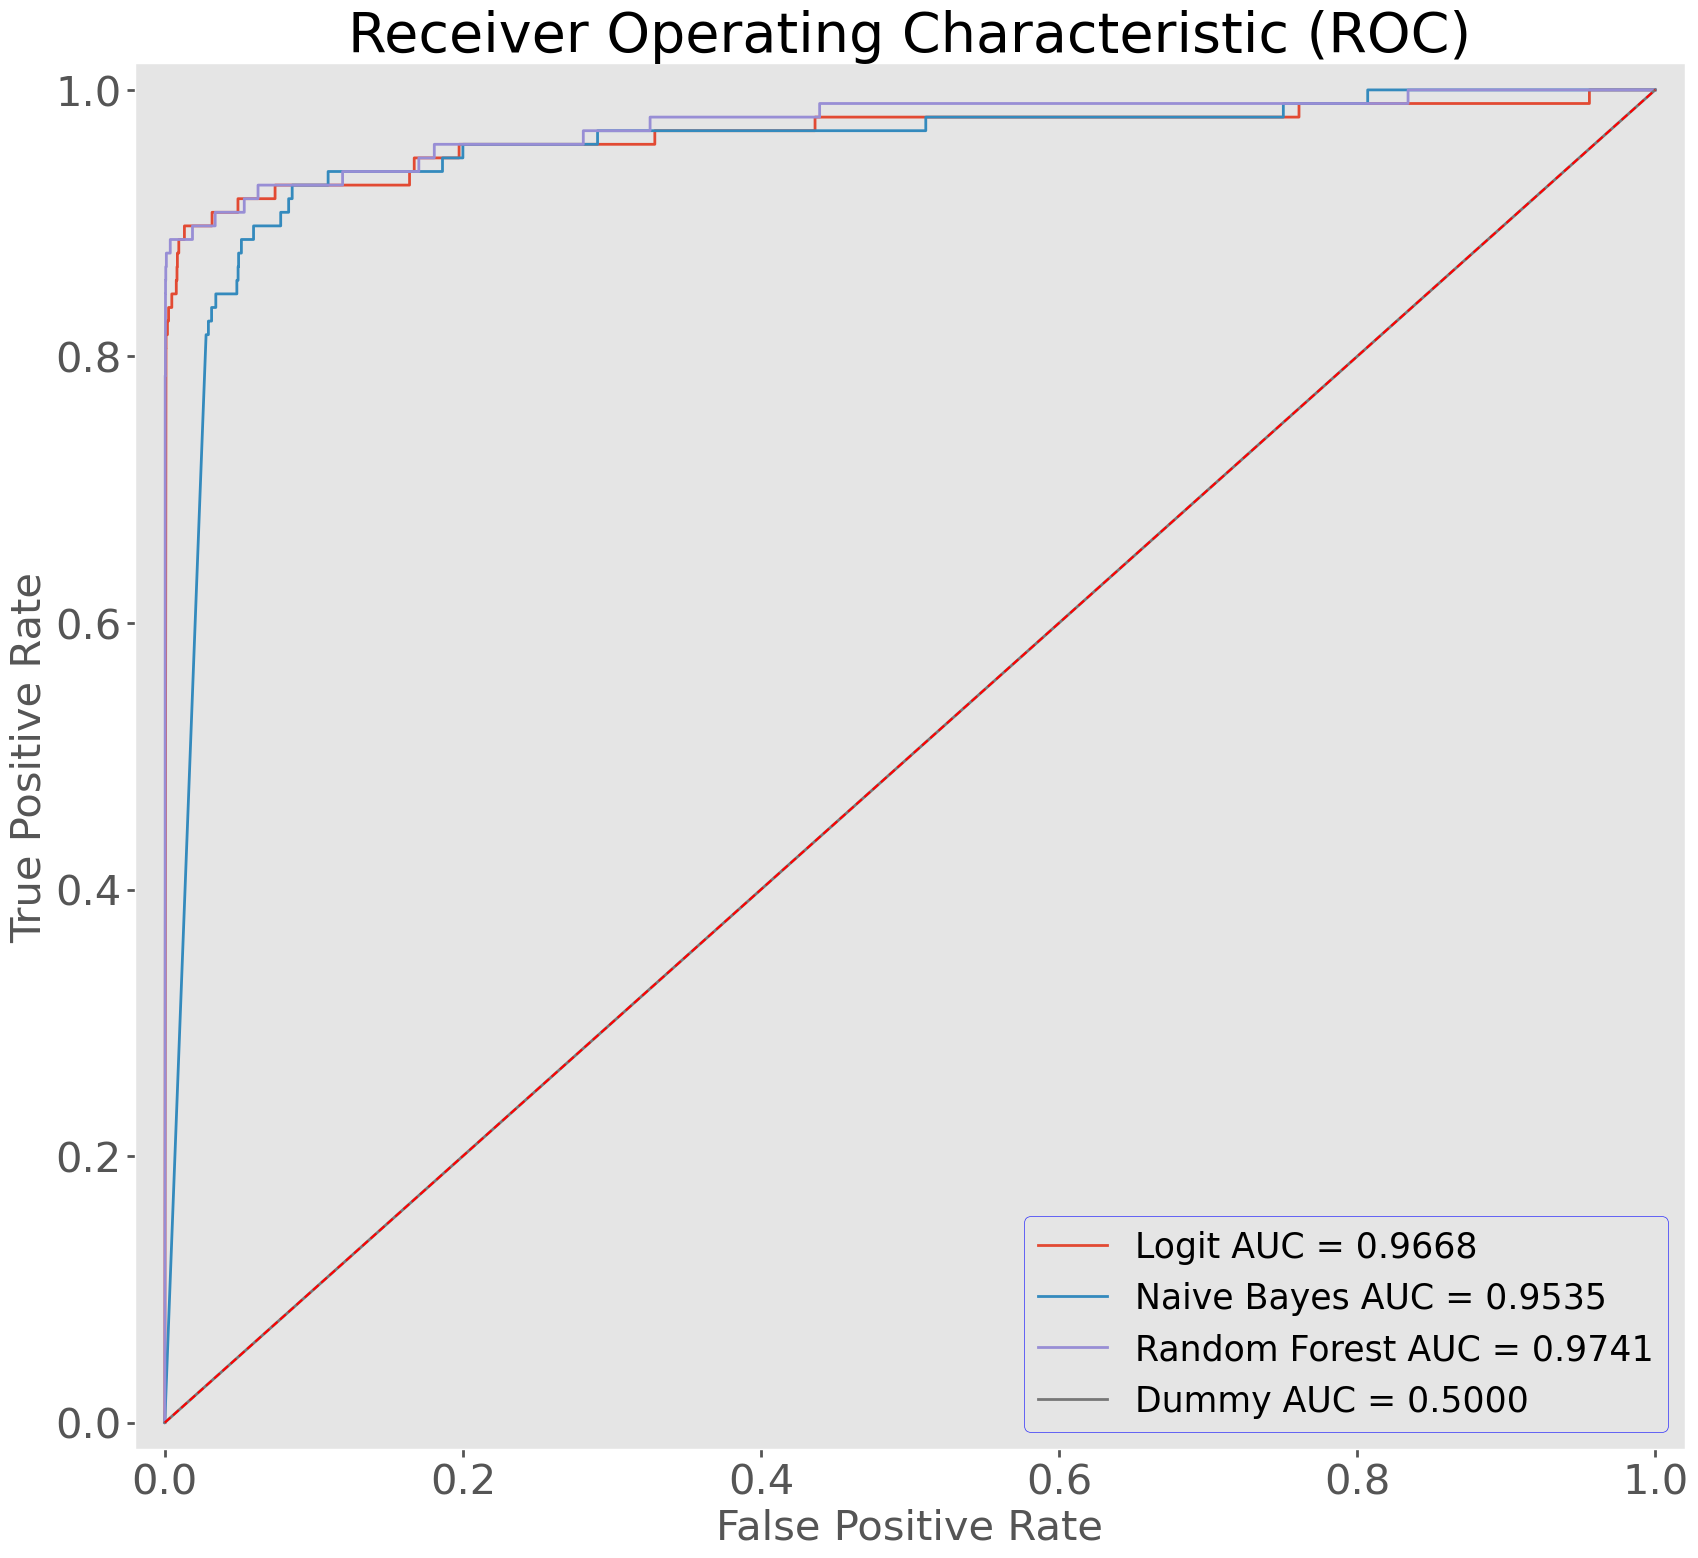

In [31]:
# Plot ROC curves for out-of-sample data
plot_roc_curves(X_test_std, y_test, models, model_names)

# Save the plot as PNG file
plt.savefig('roc_outsample.png');

#  Determine the optimal threshold for each model

In [32]:
# Define a function to find the best threshold for a given model
def find_best_threshold(model, num_steps):
    highest_f1 = 0
    best_threshold = 0
    best_acc = 0
    best_rec = 0
    best_pre = 0
    # Iterate over a range of thresholds
    for threshold in np.linspace(0, 1, num_steps):
        # Predict the target variable using the given threshold
        y_predict = (model.predict_proba(X_train_under)[:, 1] >= threshold)
        # Calculate various evaluation metrics
        f1 = f1_score(y_train_under, y_predict)
        acc = accuracy_score(y_train_under, y_predict)
        rec = recall_score(y_train_under, y_predict)
        pre = precision_score(y_train_under, y_predict)
        # Update the best threshold and metrics if F1 score improves
        if f1 > highest_f1:
            best_threshold, highest_f1, best_acc, best_rec, best_pre = \
                threshold, f1, acc, rec, pre
    # Return the best threshold and evaluation metrics
    return best_threshold, highest_f1, best_acc, best_rec, best_pre

In [33]:
# Define a list of models and their names
models = [logistic_grid, gnb_best, rf_grid]
model_names = ["Logistic Regression", "Naive-Bayes", "Random Forest"]

In [34]:
# Create an empty list to store the results
chart = list()

# Iterate over the models and find the best threshold for each one
for item, name in zip(models, model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(item, 20)
    # Append the results to the chart list
    chart.append([name, best_thresh, high_f1, high_acc, high_rec, high_pre])

# Create a pandas dataframe from the chart list and display it
chart = pd.DataFrame(chart, columns=['Model', 'Best Threshold', 'F1 Score', 'Accuracy', 'Recall', 'Precision'])
chart.to_csv('model_evaluation_scores.csv')
chart

,Model,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Logistic Regression,0.473684,0.972414,0.972881,0.955932,0.989474
1,Naive-Bayes,0.052632,0.923894,0.927119,0.884746,0.966667
2,Random Forest,0.315789,0.968067,0.967797,0.976271,0.960000


# Confusion Matrix

In [35]:
def make_confusion_matrix_val(model, threshold=0.5):
    """
    Create a confusion matrix plot for the given model and threshold. 
    
    Parameters:
    -----------
    model : sklearn classifier
        The classification model to evaluate.
    threshold : float, default=0.5
        Probability threshold for binary classification.
        
    Returns:
    --------
    None
    
    """
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_train_under)[:, 1] >= threshold)
    
    # calculate the confusion matrix
    fraud_confusion = confusion_matrix(y_train_under, y_predict)
     # plot the confusion matrix as heatmap
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Fraud', 'Fraud'],
           yticklabels=['Not Fraud', 'Fraud']);
    
    # calculate TP, FP, FN, and TN values from the confusion matrix
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    
    # rotate y-axis ticks
    plt.yticks(rotation = 0)
    
    # set plot title, x and y labels
    plt.title('Predicted vs. Actual',fontname = '.SF Compact Display',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

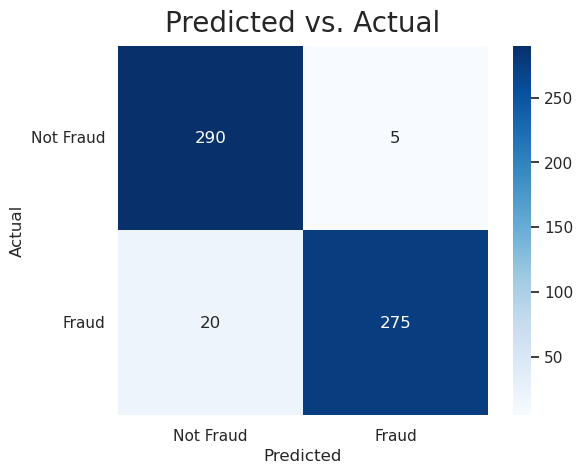

In [36]:
# Create a confusion matrix for the Random Forest model with a threshold of 0.421 on the validation data
make_confusion_matrix_val(rf_grid, threshold=0.421)

# Save the plot as PNG file
plt.savefig('confusion_matrix_val_random_forest.png');

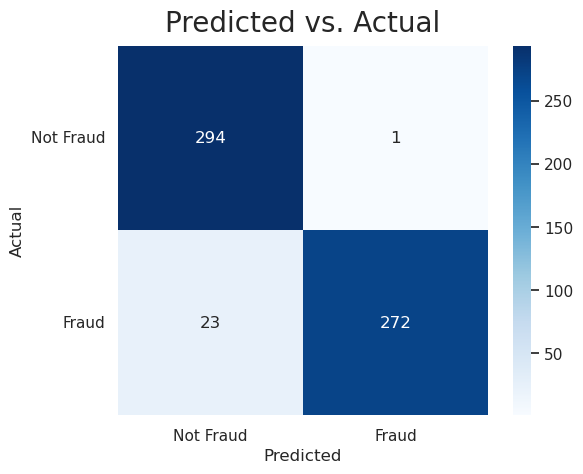

In [37]:
# Create a confusion matrix for the Logistic Regression model with a threshold of 0.842 on the validation data
make_confusion_matrix_val(logistic_grid, threshold=0.842)

# Save the plot as PNG file
plt.savefig('confusion_matrix_val_logistic_regression.png');

In [38]:
def make_confusion_matrix_test(model, threshold=0.5):
    """
    Generates a confusion matrix for a given model on the test dataset, given a threshold.

    Args:
    - model: a trained machine learning model
    - threshold: threshold for binary classification

    Returns: None
    """

    # Predict class 1 if probability of being in class 1 is greater than threshold
    y_predict = (model.predict_proba(X_test_std)[:, 1] >= threshold)

    # Generate confusion matrix
    fraud_confusion = confusion_matrix(y_test, y_predict)

    # Plot heatmap of confusion matrix
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
                xticklabels=['Not Fraud', 'Fraud'],
                yticklabels=['Not Fraud', 'Fraud'])
    # Calculate TP, FP, FN, TN
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]

    # Add title, labels and rotate y-tick labels
    plt.yticks(rotation=0)
    plt.title('Predicted vs. Actual', fontname='.SF Compact Display', fontsize=20, pad=10)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

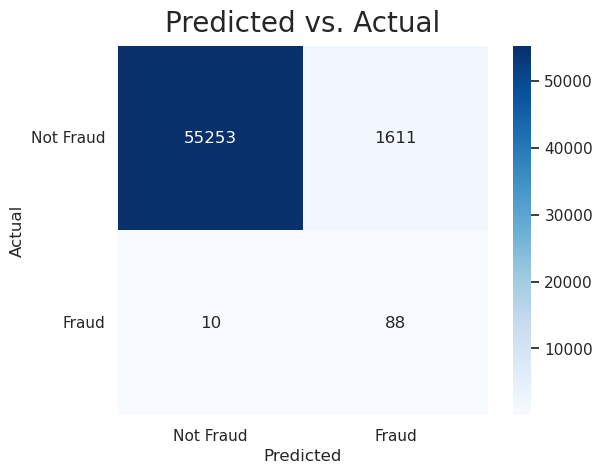

In [39]:
# Generate confusion matrix for random forest model on test dataset
make_confusion_matrix_test(rf_grid, threshold=0.421)

# Save the plot as PNG file
plt.savefig('confusion_matrix_test_random_forest.png');

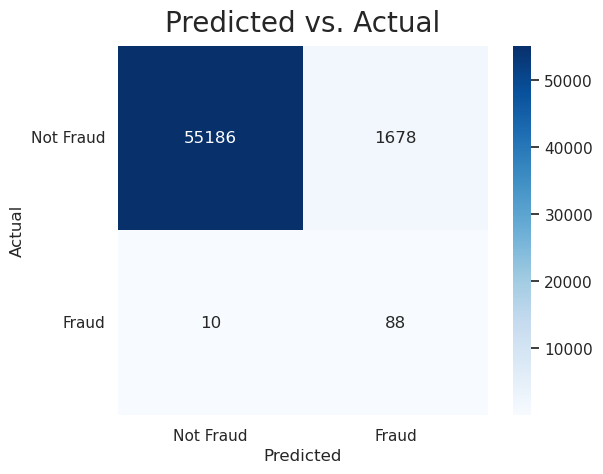

[CV 1/5; 20/24] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=700;, score=0.990 total time=   2.8s
[CV 5/5; 20/24] START max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=700
[CV 5/5; 20/24] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=700;, score=0.989 total time=   2.9s
[CV 5/5; 21/24] START max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=500
[CV 5/5; 21/24] END max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=500;, score=0.985 total time=   2.0s
[CV 4/5; 22/24] START max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=700
[CV 4/5; 22/24] END max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=700;, score=0.948 total time=   2.7s
[CV 3/5; 23/24] START max_depth=15, max_features=sqrt, min_samples_leaf=20, mi

In [40]:
# Generate confusion matrix for logistic regression model on test dataset
make_confusion_matrix_test(logistic_grid, threshold=0.842)

# Save the plot as PNG file
plt.savefig('confusion_matrix_test_logistic_regression.png');